# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
query_url = url + weather_api_key
query_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=6e8c82e66c6e77c89f15a330ab10306e'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "sunrise": 1579671676,
        "sunset": 1579700412,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 63
            },
            "dt": 1579662000,
            "dt_txt": "2020-01-22 03:00:00",
            "main": {
                "feels_like": 266.86,
                "grnd_level": 979,
                "humidity": 77,
                "pressure": 1001,
                "sea_level": 1001,
                "temp": 273.67,
                "temp_kf": 1.35,
                "temp_max": 273.67,
                "temp_min": 272.32
            },
            "sys": {
                "pod": "n"
            },
            "weather": [
                {
                    "description": "broken clouds",
                    "icon": "0

In [5]:
print(weather_json['city']['name'])

Moscow


In [6]:
city_list = []
cloud = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind = []
count = 0

for city in cities:
    weather_response = requests.get(query_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        city_list.append(weather_json['city']['name'])
        cloud.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lon.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
    except:
        pass
        

In [9]:
weather_data = {"city": city_list, "Lat": lat, "lon": lon, "max temp": max_temp,
             "Humidity": humidity, "Cloudiness": cloud, "wind speed": wind, "country": country,
             "date":date}
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,city,Lat,lon,max temp,Humidity,Cloudiness,wind speed,country,date
0,Hong Kong,22.2855,114.1577,73.76,73,67,5.06,HK,1579662000
1,Albany,42.6001,-73.9662,16.88,83,0,3.96,US,1579662000
2,Quatre Cocos,-20.2078,57.7625,80.06,86,100,13.94,MU,1579662000
3,Cape Town,-33.9258,18.4232,68.61,76,60,2.95,ZA,1579662000
4,Novikovo,51.1537,37.8879,35.35,92,99,16.22,RU,1579662000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [16]:
weather_df.to_csv(r'weather_data.csv')
weather_df.head()


,city,Lat,lon,max temp,Humidity,Cloudiness,wind speed,country,date
0,Hong Kong,22.2855,114.1577,73.76,73,67,5.06,HK,1579662000
1,Albany,42.6001,-73.9662,16.88,83,0,3.96,US,1579662000
2,Quatre Cocos,-20.2078,57.7625,80.06,86,100,13.94,MU,1579662000
3,Cape Town,-33.9258,18.4232,68.61,76,60,2.95,ZA,1579662000
4,Novikovo,51.1537,37.8879,35.35,92,99,16.22,RU,1579662000


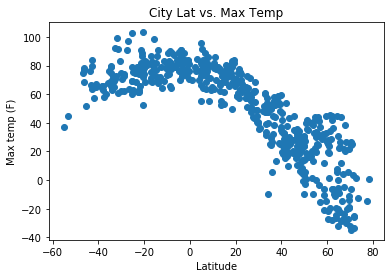

In [19]:
latscat = weather_df["Lat"]
tempscat = weather_df["max temp"]

plt.scatter(latscat, tempscat)
plt.title('City Lat vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max temp (F)')
plt.savefig('TempvLat')
plt.show()

#### Latitude vs. Humidity Plot

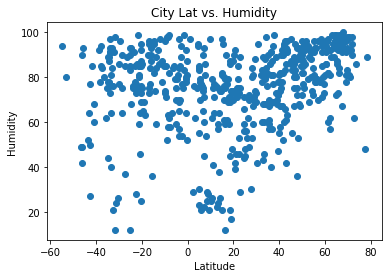

In [20]:
#latscat = weather_df["Lat"]
humscat = weather_df["Humidity"]

plt.scatter(latscat, humscat)
plt.title('City Lat vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('LatVHum')
plt.show()

#### Latitude vs. Cloudiness Plot

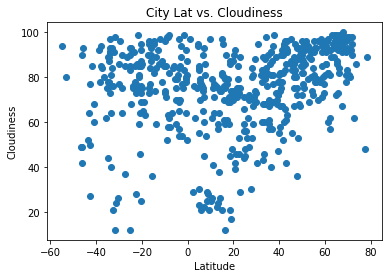

In [22]:
#latscat = weather_df["Lat"]
cloudscat = weather_df["Cloudiness"]

plt.scatter(latscat, humscat)
plt.title('City Lat vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('LatVclo')
plt.show()

#### Latitude vs. Wind Speed Plot

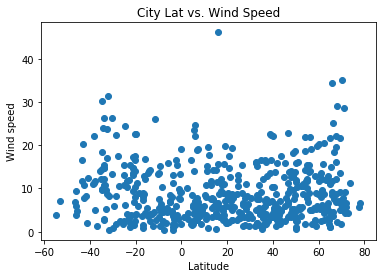

In [24]:
#latscat = weather_df["Lat"]
windscat = weather_df["wind speed"]

plt.scatter(latscat, windscat)
plt.title('City Lat vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.savefig('LatVHum')
plt.show()

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coord,fontsize=14,color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()
                                                        


In [36]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df["Lat"] >= 0,:]
southern = weather_df.loc[weather_df["Lat"] <= 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.8662751097033772


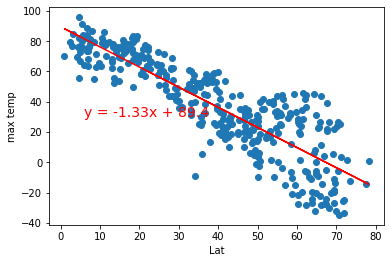

In [37]:
x_values = northern["Lat"]
y_values = northern["max temp"]
plot_linear_regression(x_values, y_values, 'max temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4567387054595689


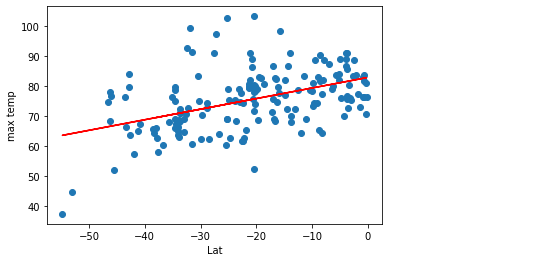

In [38]:
x_values = southern["Lat"]
y_values = southern["max temp"]
plot_linear_regression(x_values, y_values, 'max temp', (6,30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.5110886216490547


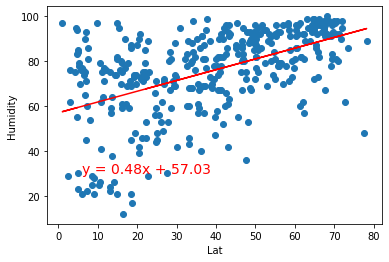

In [39]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.11788701818965316


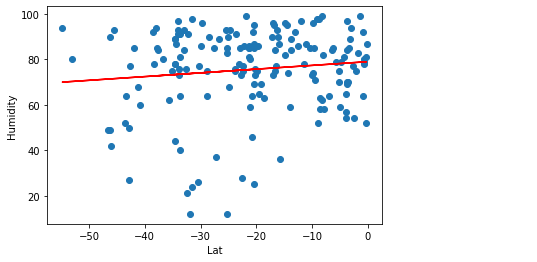

In [40]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.3042774221122652


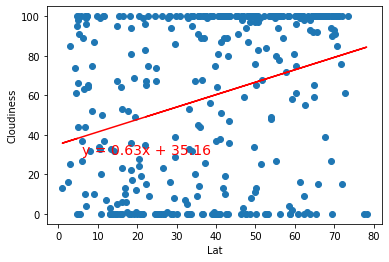

In [42]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.15492476670682823


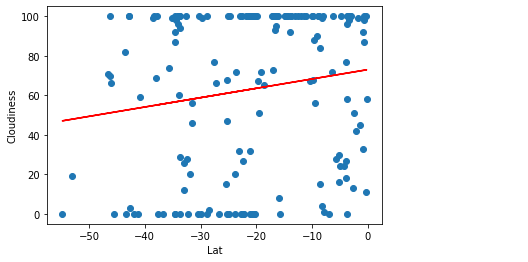

In [43]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.12432365735477342


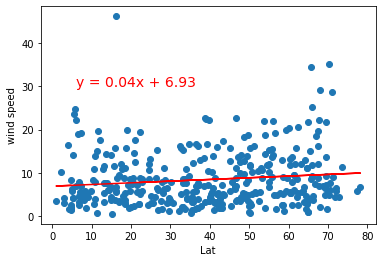

In [44]:
x_values = northern["Lat"]
y_values = northern["wind speed"]
plot_linear_regression(x_values, y_values, 'wind speed', (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern["Lat"]
y_values = southern["wind speed"]
plot_linear_regression(x_values, y_values, 'wind speed', (6,30))